# Data Science TASK-1

***Author :- KSHITIZ AGARWAL***

*** Iris Flowers MachineLearning Project(Beginner's Task) ***

### Importing important libraries

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Loading Data Set

In [2]:
dataset = pd.read_csv('Iris.csv')

### 1.EDA

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.shape

(150, 6)

In [5]:
# funtion to get the info about data .
def get_df_info(df, include_unique_values = False):
    col_name_list = list(df.columns)
    col_type_list = [type(df[col][0]) for col in col_name_list]
    col_null_count_list = [df[col].isnull().sum() for col in col_name_list]
    col_unique_count_list = [df[col].nunique() for col in col_name_list]
    col_memory_usage_list = [df[col].memory_usage(deep = True) for col in col_name_list]
    df_total_memory_usage = sum(col_memory_usage_list)/1048576
    if include_unique_values :
        col_unqiue_values_list = [df[col].unique() for col in col_name_list]
        df_info = pd.DataFrame({'column_name' : col_name_list, 'column_type': col_type_list,
                                'null_count': col_null_count_list, 'nunique':col_unique_count_list,
                                'unique_values' : col_unqiue_values_list
                               })
    else:
         df_info = pd.DataFrame({'column_name' : col_name_list, 'column_type': col_type_list,
                                'null_count': col_null_count_list, 'nunique':col_unique_count_list
                                }) 
    return df_info, df_total_memory_usage

    
    

In [6]:
dataset_info , dataset_total_memory_usage = get_df_info(dataset, True)
dataset_total_memory_usage

0.016515731811523438

In [7]:
dataset_info

,column_name,column_type,null_count,nunique,unique_values
0,Id,<class 'numpy.int64'>,0,150,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,SepalLengthCm,<class 'numpy.float64'>,0,35,"[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, ..."
2,SepalWidthCm,<class 'numpy.float64'>,0,23,"[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, ..."
3,PetalLengthCm,<class 'numpy.float64'>,0,43,"[1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ..."
4,PetalWidthCm,<class 'numpy.float64'>,0,22,"[0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, ..."
5,Species,<class 'str'>,0,3,"[Iris-setosa, Iris-versicolor, Iris-virginica]"


In [8]:
#To get statstical info about the data
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
dataset.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Data Viz.

<AxesSubplot:>

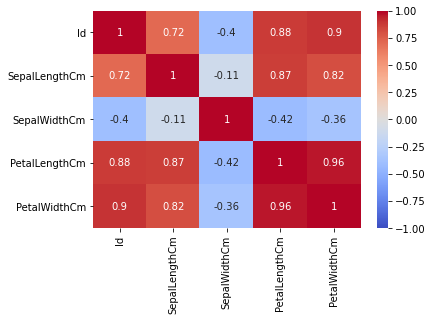

In [10]:
import seaborn as sb
sb.heatmap(dataset.corr(), cmap = 'coolwarm', vmin= -1, vmax= 1, annot=True)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

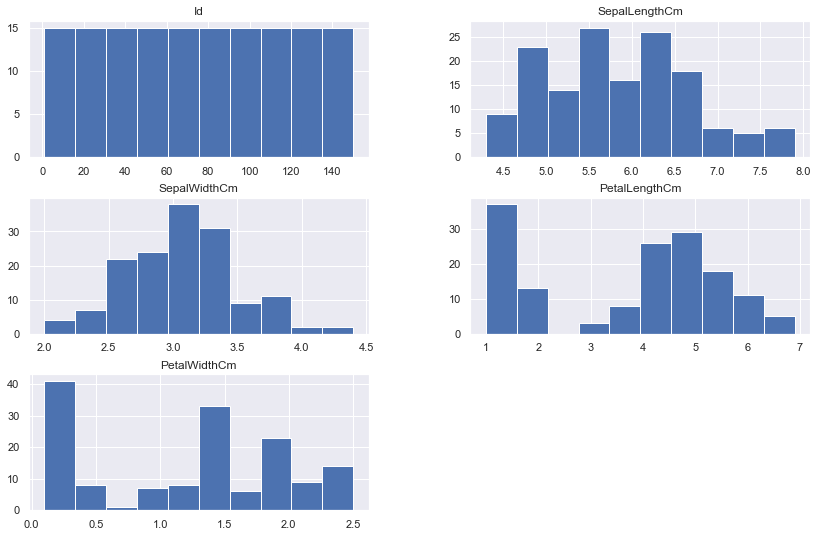

In [11]:
sb.set(rc = {'figure.figsize' : (14, 9)} )
dataset.hist()

In [12]:
#splitting the dataset into training & testing 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(dataset.loc[:,'SepalLengthCm':'PetalWidthCm'],dataset.Species, random_state = 0)

In [13]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(112, 4) (38, 4)
(112,) (38,)


### 2. MAKING ML MODELS

In [14]:
### Importing Libraries to make model
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.tree import DecisionTreeClassifier as dtc

#### 2.1 USING GAUSSIAN NAIVE BAYES

In [15]:
nb1 = nb()
nb1.fit(x_train,y_train)

GaussianNB()

#### 2.2 USING DECISION TREE CLASSIFIER

In [16]:
dt = dtc(random_state = 0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

### 3. CHECKING THE MODEL'S ACCURACY 

In [17]:
#getting the predictions
nb1_pred = nb1.predict(x_test)
dt_pred = dt.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(accuracy_score(y_test,nb1_pred))
print(accuracy_score(y_test, dt_pred))

1.0
0.9736842105263158


<pre>
 Since the accuracy score for gaussian naive bayes(nb1) model is 1, quite greater than that of 
 DECISION TREE. So, we will use nb1.
</pre>

In [20]:
#testing on any new data
new_data = np.array([[1,5.1,6,0.2]])
new_pred = nb1.predict(new_data)
print(new_pred)

['Iris-virginica']
